# Trabajo Práctico N°7 - Morfología
## Integrantes:
## Bertachini, Germán
## Oh, Victor

*Librerías a utilizar*

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Ej.1 - Dilación de una imagen


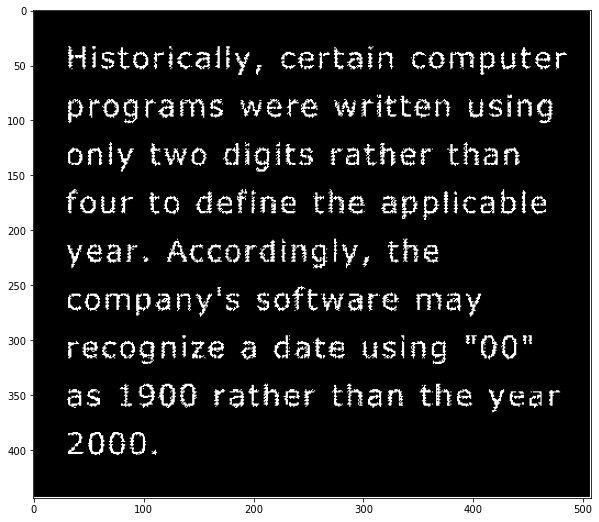

In [4]:
cita = cv2.imread("Recursos/Broken_Text.tif")
cita = cv2.cvtColor(cita, cv2.COLOR_BGR2GRAY)

fig = plt.figure(figsize=(10, 10))
plt.imshow(cita, cmap='gray')
plt.show()

Por consigna se utiliza el siguiente kernel
$$ B = \begin{pmatrix} 0 & 1 & 0 \\ 1 & 1 & 1 \\ 0 & 1 & 0 \end{pmatrix} $$

In [6]:
#Defino el kernel B
Kernel_B = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]).astype(np.uint8)
cita_dilatada = cv2.dilate(cita, Kernel_B, iterations=1)

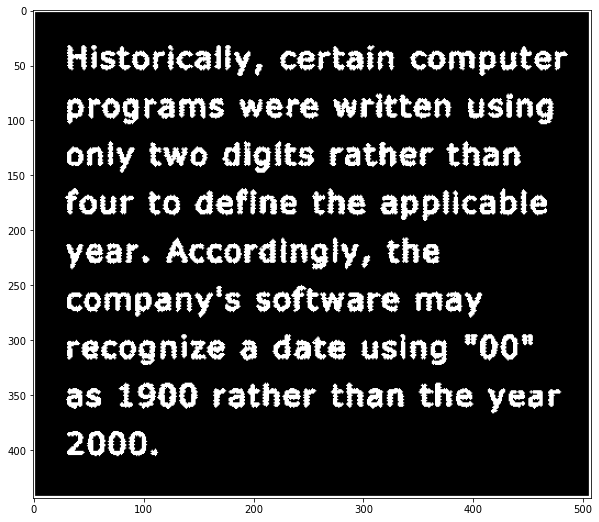

In [8]:
#Grafico la nueva imagen con un texto con mayor claridad debido a la dilación
fig = plt.figure(figsize=(10, 10))
plt.imshow(cita_dilatada, cmap='gray')
plt.show()

Se observa como la dilación mejora la claridad de la imagen dado que aumenta las partes blancas.

## Ej.2 - Dilatación + erosión


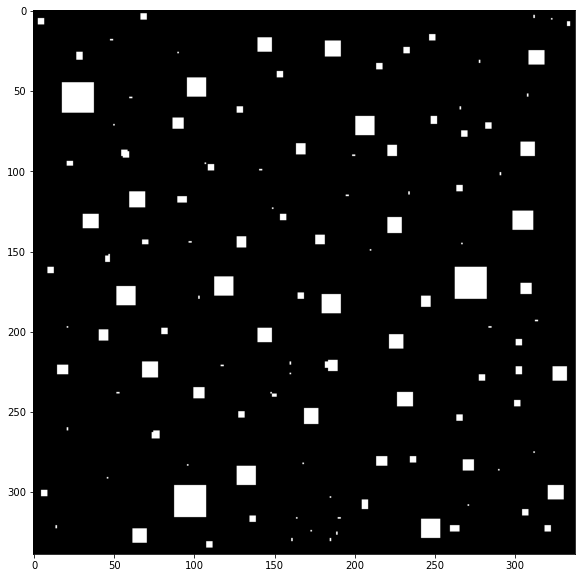

In [9]:
#Cargamos la imagen original
cuadrados = cv2.imread("Recursos/Noisy_Squares.tif")
cuadrados = cv2.cvtColor(cuadrados, cv2.COLOR_BGR2GRAY)

fig = plt.figure(figsize=(10, 10))
plt.imshow(cuadrados, cmap='gray')
plt.show()

### Erosión de la imagen
Erosionamos la imagen con un elemento cuadrado de 13x13 pixeles lleno de 1s. Al aplicar la erosión con este elemento se provoca que todos objetos presentes en una imagen se achiquen siginificativamente. Si el objeto es de menor tamaño al del elemento, el mismo desaparecerá de la imagen.

In [12]:
elemento_erosivo = np.ones((13, 13))

In [13]:
imagen_erosionada = cv2.erode(cuadrados, elemento_erosivo)

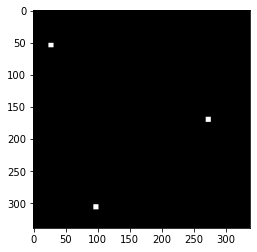

In [14]:
plt.imshow(imagen_erosionada, cmap='gray')

### Dilatación de la imagen
Dilatamos la imagen con un elemento cuadrado de 13x13 pixeles lleno de 1s. Al aplicar la dilatación se expanden los objetos presentes en la imagen. Aquellos que fueron eliminados por la erosión no pueden ser recuperados.


In [15]:
elemento_dilatador=elemento_erosivo

In [16]:
imagen_dilatada = cv2.dilate(imagen_erosionada, elemento_dilatador)

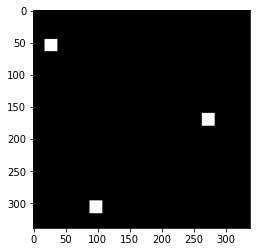

In [17]:
plt.imshow(imagen_dilatada, cmap='gray')

La erosión es una manera fácil de eliminar elementos no deseados de tamaño menor al del kernel, para después restaurarlos a su tamaño original con una dilatación.

## Ej.3 - Apertura


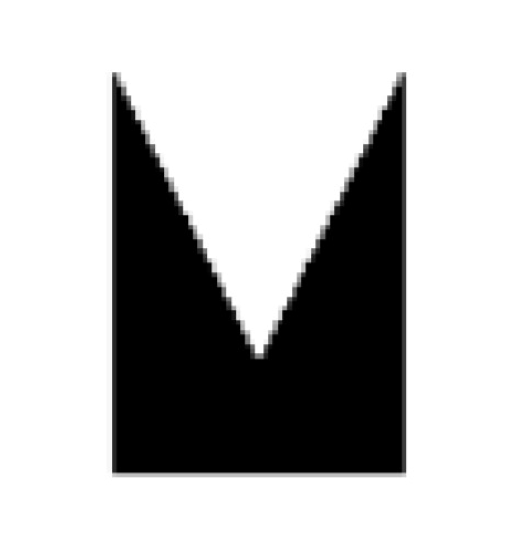

In [46]:
figb = cv2.imread("Recursos/figura_b.jpg", cv2.IMREAD_GRAYSCALE)/255


fig = plt.figure(figsize=(10, 10))
plt.imshow(figb, cmap='gray')
plt.axis('off')
plt.show()

In [49]:
def plot_radio(elemento_b, radio):
    
    #invierto los colores para poder aplicar el filtro
    elemento_b_neg = (elemento_b <= 0.5).astype(np.uint8)

    #Creo mi kernel circular
    Y_size, X_size = np.ogrid[:2*radio + 1, :2*radio + 1]
    radio_ = np.sqrt((X_size - radio)**2 + (Y_size - radio)**2)
    kernel_circular = (radio_ < radio).astype(np.uint8)
    
    #primero erosiono y después dilato la imagen
    imagen_erosionada = cv2.erode(elemento_b_neg,kernel_circular,iterations = 1) 
    imagen_dilatada=cv2.dilate(imagen_erosionada,kernel_circular,iterations = 1)
      
    #vuelvo a invertir los colores
    imagen_dilatada_neg = (imagen_dilatada <= 0.5).astype(np.uint8)

    fig, ax = plt.subplots(1, 2, figsize=(10, 8))    
    fig.suptitle(f'Radio={radio}px', fontsize=18)
    fig.tight_layout(rect=[0, 0.15, 1, 1])
    ax[0].imshow(elemento_b, cmap='gray')
    ax[0].axis('off')
    ax[0].set_title('Imagen original', fontsize=15)
    ax[1].imshow(imagen_dilatada_neg, cmap='gray')
    ax[1].axis('off')
    ax[1].set_title('Filtrado', fontsize=15)
    plt.show()
    

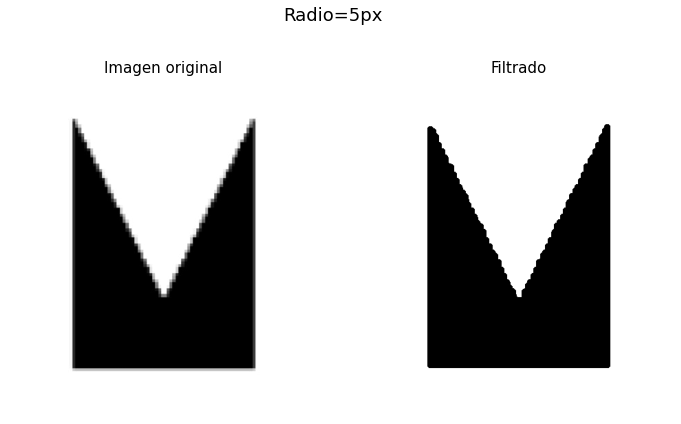

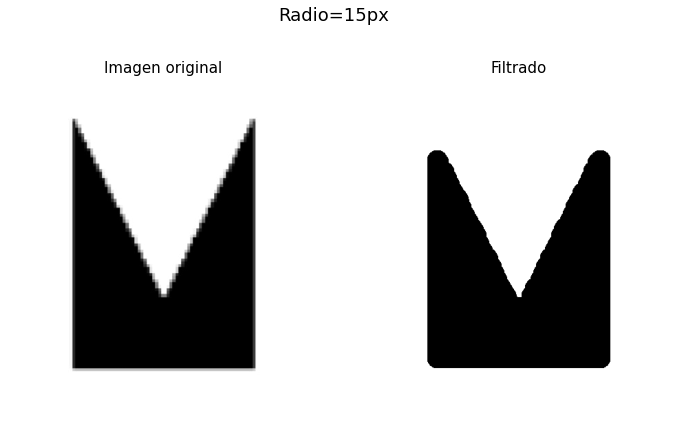

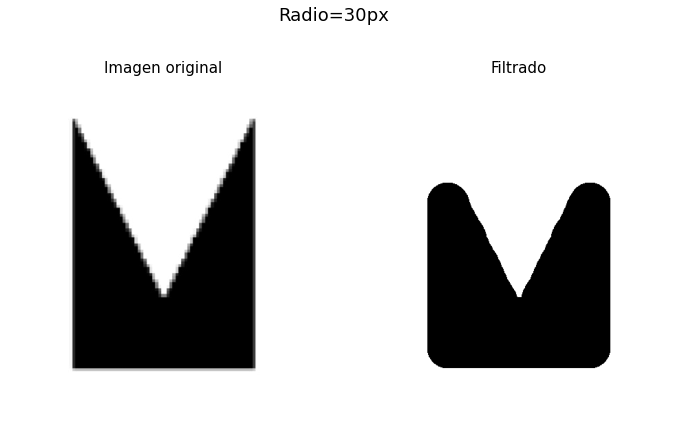

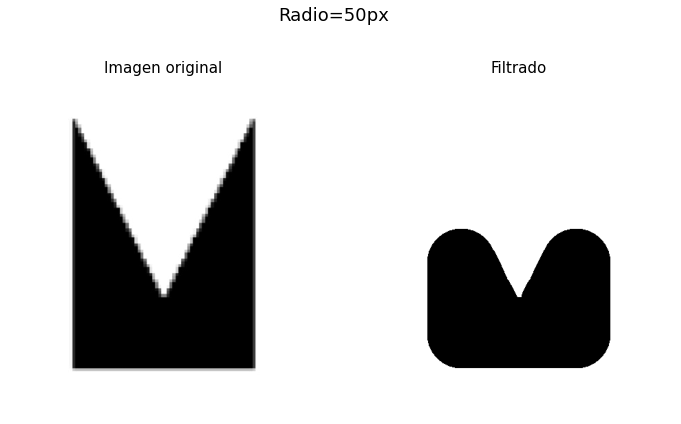

In [50]:
#Aplico el algoritmo usando los siguientes radios
radios = [5, 15, 30, 50]
for radio in radios:
    plot_radio(figb, radio)

## Ej.4 - Contorno


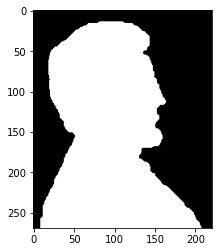

In [52]:
retrato = cv2.imread('Recursos/Lincoln_penny.tif')
plt.imshow(retrato)
plt.show()

In [65]:
#Defino un ancho para el contorno en pixeles
ancho_contorno=3
#Creo un kernel para aplicar sobre la imagen
kernel_contorno = np.ones((ancho_contorno, ancho_contorno), np.uint8)  #Kernerl
#Recupero el contorno aplicando el kernel sobre la figura mediante un proceso de erosión, borro los bordes, y restandole la imagen original
bordes_retrato = retrato - cv2.erode(retrato, kernel_contorno, iterations=1) 

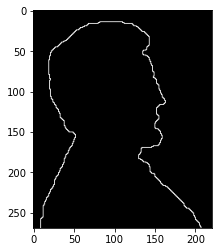

In [66]:
#Muestro el resultado
plt.imshow(bordes_retrato)
plt.show()